In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [3]:
home = pd.read_csv('/Users/arjunbali/Downloads/home_price.csv')
home.columns
home.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
home.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


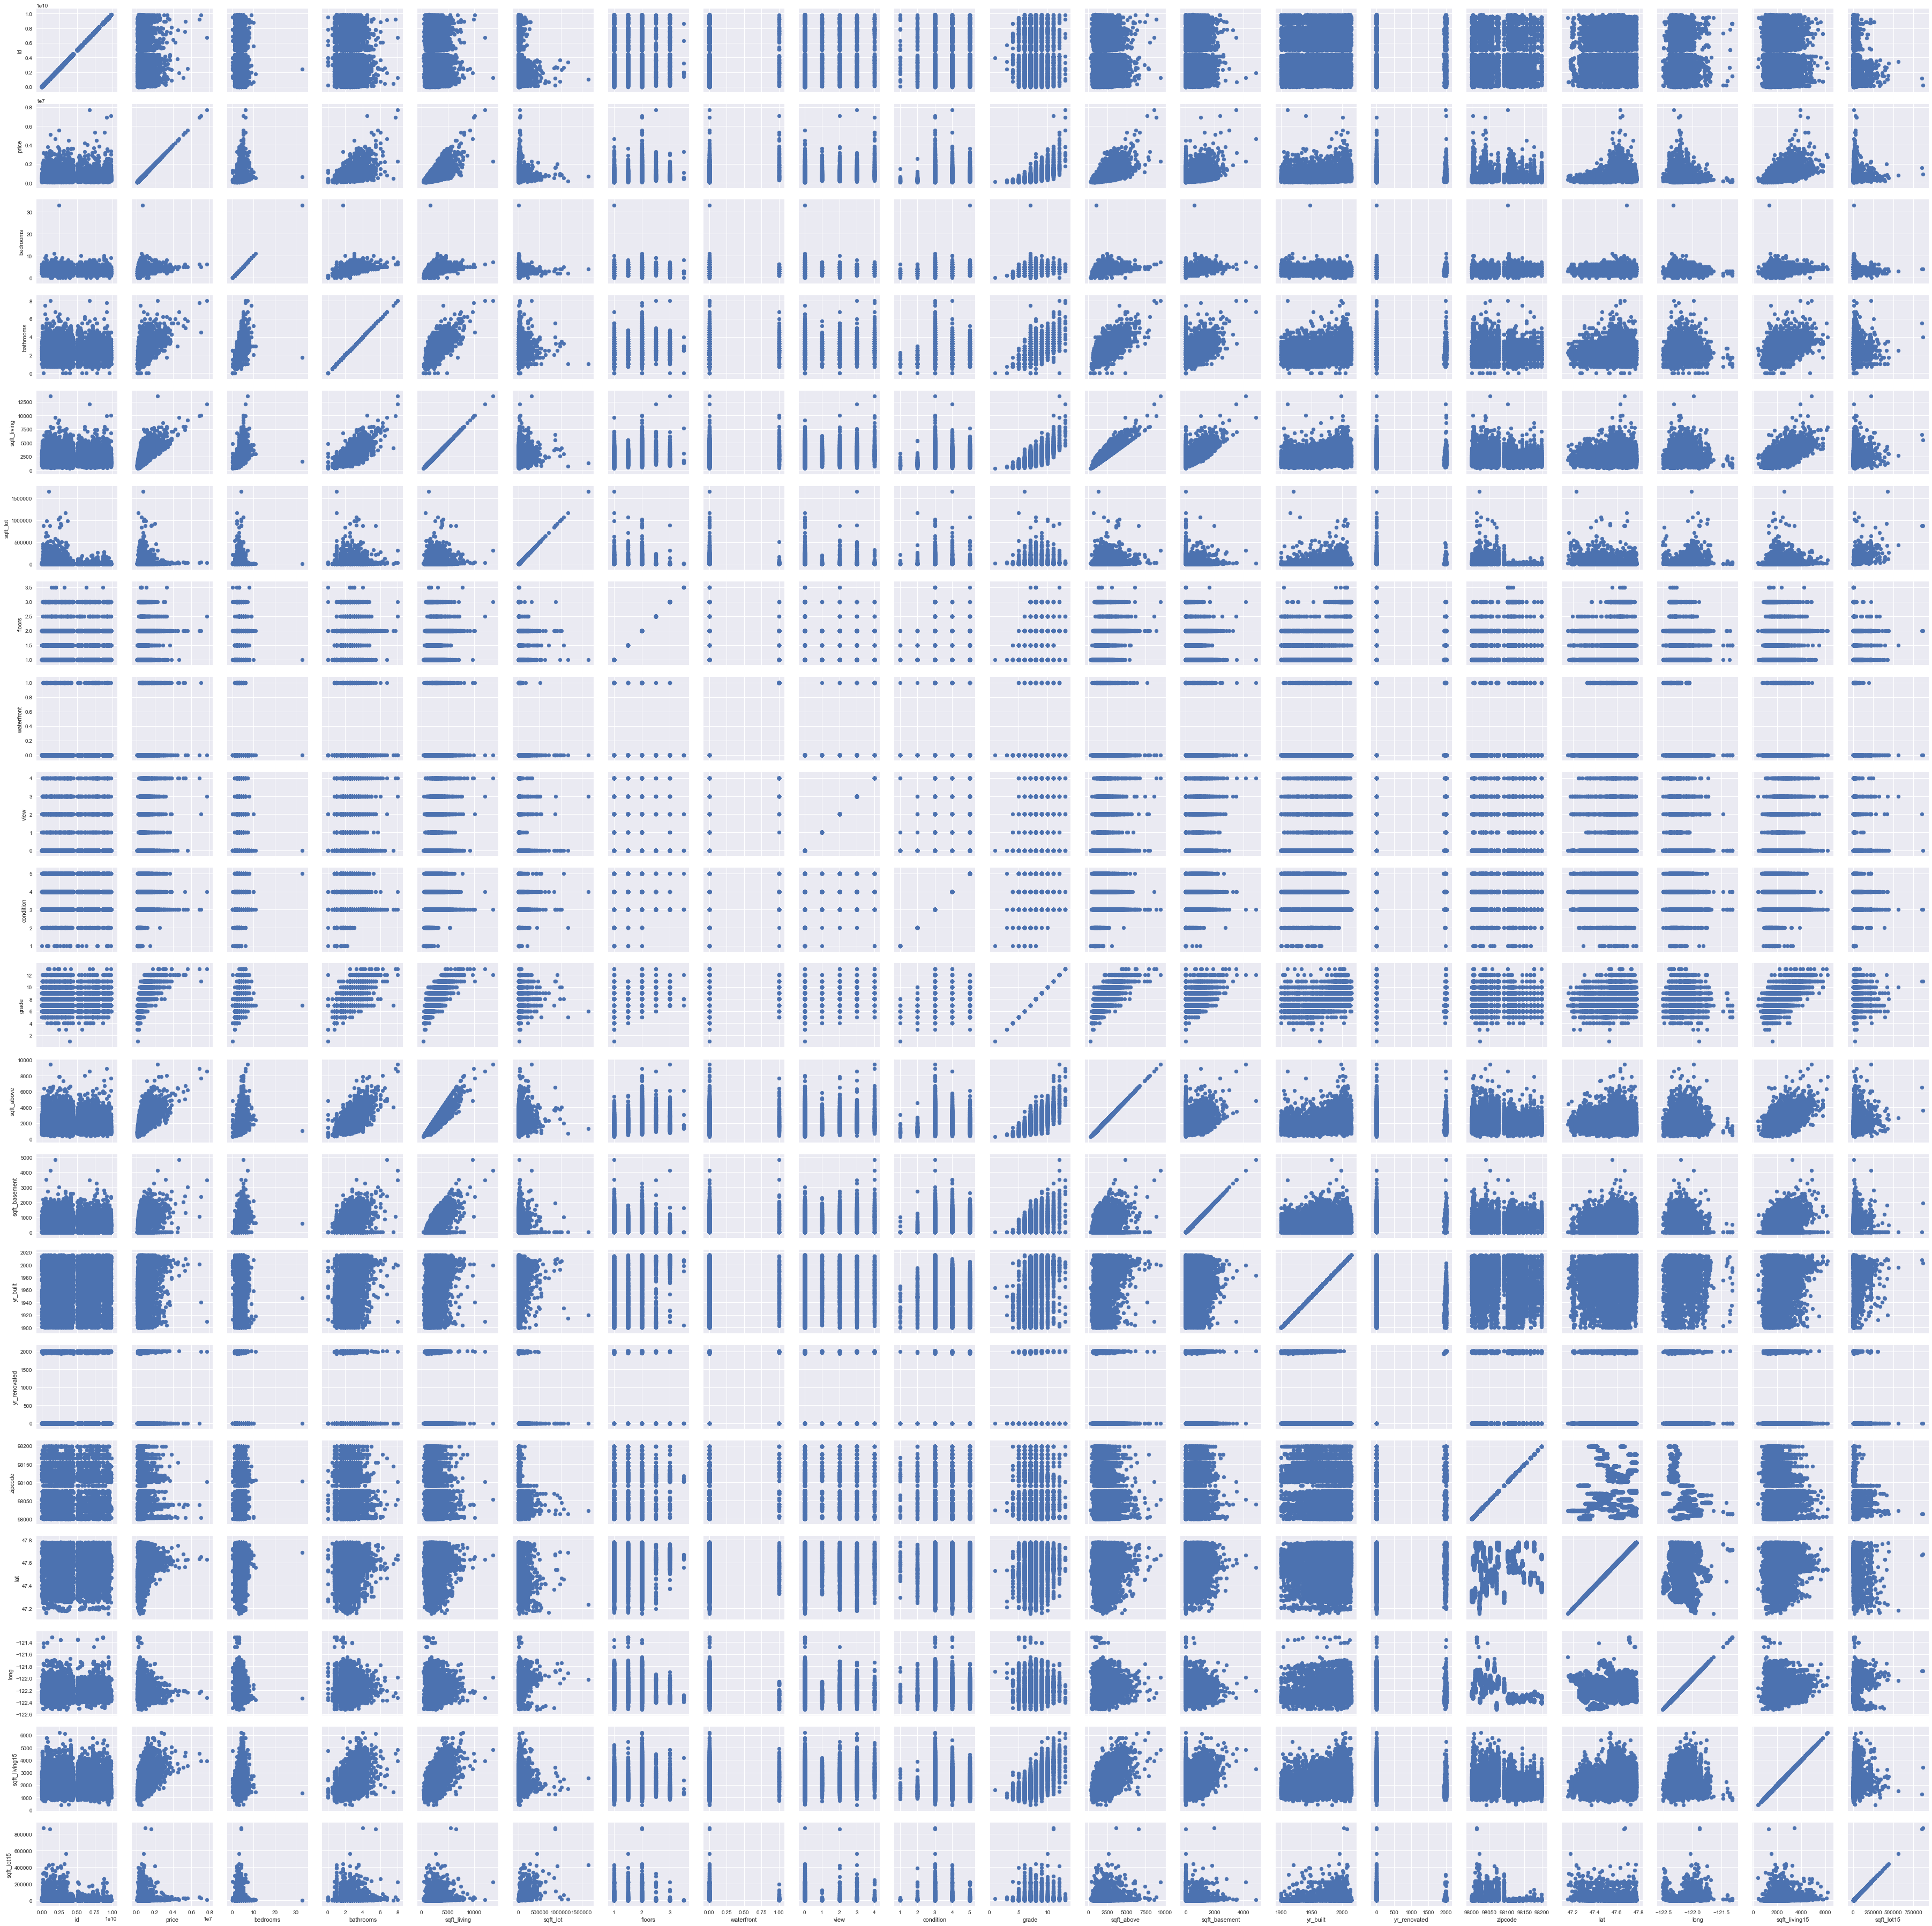

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
g = sns.PairGrid(home)
g = g.map(plt.scatter)
plt.show()

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

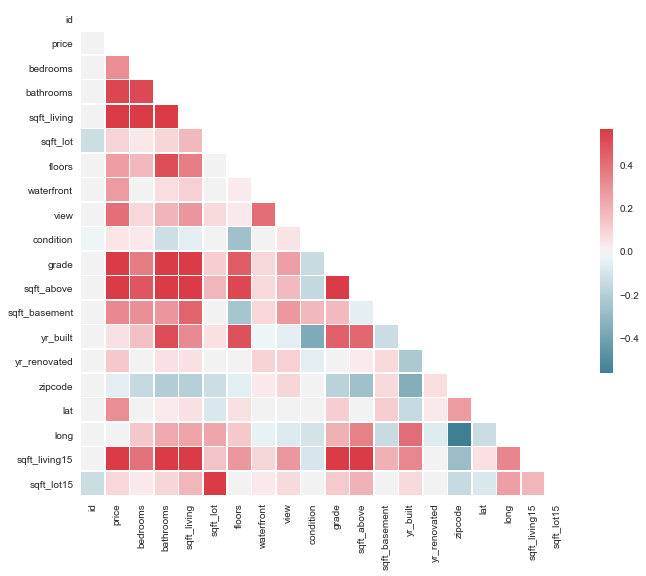

In [6]:
print(home.corr())


from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")



# Compute the correlation matrix
corr = home.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Part 1
    

In [7]:
home.head(5)
home1 = home.copy()
home1.describe()

homenewcol = []
j=0
for i in home1['date']:
    if(j < len(home1['date'])):
        homenewcol.append(str(home1['date'][j]).split('T')[0])
        j = j+1
        
    
home1['date'] = homenewcol

home1.head(5)
home1.drop(home1['id'] == 9808700762,inplace = True)

In [8]:
home1['date'] = pd.to_datetime(home1['date'],format= "%Y-%m-%d" )

home1.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [9]:
home1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 2 to 21612
Data columns (total 21 columns):
id               21611 non-null int64
date             21611 non-null datetime64[ns]
price            21611 non-null int64
bedrooms         21611 non-null int64
bathrooms        21611 non-null float64
sqft_living      21611 non-null int64
sqft_lot         21611 non-null int64
floors           21611 non-null float64
waterfront       21611 non-null int64
view             21611 non-null int64
condition        21611 non-null int64
grade            21611 non-null int64
sqft_above       21611 non-null int64
sqft_basement    21611 non-null int64
yr_built         21611 non-null int64
yr_renovated     21611 non-null int64
zipcode          21611 non-null int64
lat              21611 non-null float64
long             21611 non-null float64
sqft_living15    21611 non-null int64
sqft_lot15       21611 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(16)
memory usage: 3.6 MB


In [31]:
feature_home = ['sqft_living','view','waterfront','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long']
x_home = home1[feature_home]
y_home = home1['price']
X_home2=home1[['sqft_living','waterfront','condition','grade','sqft_above','sqft_basement','yr_renovated','lat','long','yr_built']]
X_home3=home1[['sqft_living','view','waterfront','condition','grade','sqft_above','sqft_basement','yr_renovated','lat','long']]

In [32]:
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x_home, y_home, random_state = 0)

linreg = LinearRegression().fit(x_train, y_train)
#regression_model = LinearRegression()
#regression_model.fit(x_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(x_test, y_test)))
#for idx, col_name in enumerate(x_train.columns):
#    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

home_y_pred = linreg.predict(x_test)



linear model coeff (w): [ -2.57182466e+15   5.48505000e+04   6.41724456e+05   3.05252617e+04
   1.05645424e+05   2.57182466e+15   2.57182466e+15  -2.07271094e+03
   2.29218750e+01   5.81741388e+05  -1.15627028e+05]
linear model intercept (b): -38489767.902
R-squared score (training): 0.691
R-squared score (test): 0.680


In [34]:
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(X_home3, y_home, random_state = 0)

linreg = LinearRegression().fit(x_train, y_train)
#regression_model = LinearRegression()
#regression_model.fit(x_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(x_test, y_test)))
#for idx, col_name in enumerate(x_train.columns):
#    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

home_y_pred = linreg.predict(x_test)

linear model coeff (w): [ -2.72258173e+15   6.18810000e+04   6.30794739e+05   5.56051747e+04
   8.45062153e+04   2.72258173e+15   2.72258173e+15   5.47812500e+01
   6.48391636e+05  -2.23652946e+05]
linear model intercept (b): -58878552.084
R-squared score (training): 0.676
R-squared score (test): 0.663


In [22]:
# The mean squared error
import math

def rmse_metric(actual=[], predicted=[]):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    print("Mean squared error: %.2f" % mean_error)
    return math.sqrt(mean_error)
    

print("RMSE : %.2f" % rmse_metric(y_test.tolist(),home_y_pred))


Mean squared error: 49512884339.16
RMSE : 222514.91


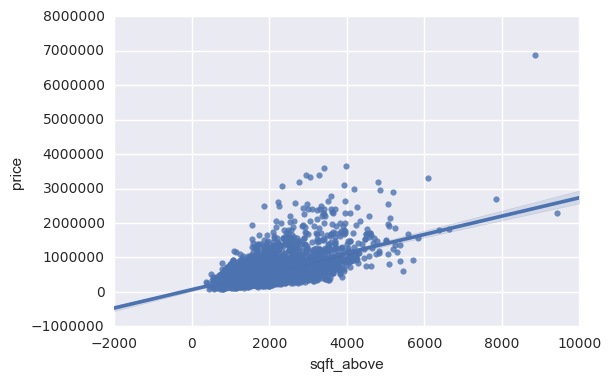

In [96]:
import seaborn as sns; sns.set(color_codes=True)
data358 = pd.concat([x_test['sqft_above'],y_test],axis = 1)
ax = sns.regplot(x=x_test['sqft_above'], y=y_test, data=data358)
plt.show()



In [97]:
#plt.scatter(x_test, y_test,  color='black')

#plt.plot(x_test['sqft_above'],y_test,'.',
 #        x_test['sqft_above'],home_y_pred,'-')
#plt.scatter(x_test['sqft_above'], y_test,  color='black')
#plt.plot(x_test['sqft_above'],home_y_pred,'-')

       
#plt.show()

# Part 2

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
x_F1_poly = poly.fit_transform(x_home)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_F1_poly, y_home,
                                                   random_state = 0)
linreg = LinearRegression().fit(x_train1, y_train1)
home_y_pred1 = linreg.predict(x_test1)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(x_train1, y_train1)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(x_test1, y_test1)))


Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[  3.77798765e+00  -4.16442010e+09   5.39823319e+06  -4.36149630e+09
   3.93185432e+06  -2.29732830e+07   4.16438862e+09   4.16439958e+09
   4.92940123e+05   1.01760583e+04   8.91353905e+07  -8.60531035e+06
  -2.37440548e+11  -2.01351152e+07   7.52171577e+06   1.55105161e+07
   3.06631346e+07   1.51320523e+11   1.96441587e+11   9.53826226e+09
  -1.87434856e+09   4.33792520e+09   3.39316813e+09   8.60412661e+03
  -1.01461094e+05   1.47407911e+04   1.30046692e+04   2.01350970e+07
   2.01350951e+07  -1.18468440e+02  -6.22206539e+00  -2.86994105e+03
   4.18925091e+04   4.46669908e+09  -1.31673110e+03  -1.30765443e+05
  -7.52143945e+06  -7.52150427e+06   3.03658026e+03   1.19782414e+01
   8.07189667e+05   1.21272944e+06  -6.29008952e+03   6.80313637e+03
  -1.55104861e+07  -1.55104950e+07  -2.10651712e+02  -1.29763413e+01
  -1.60285809e+04   2.27183784e+04   1

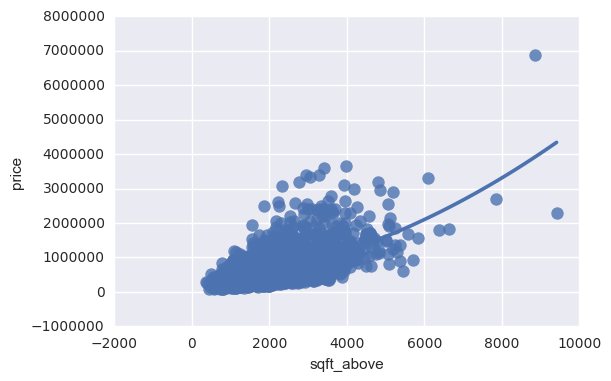

In [99]:
import seaborn as sns; sns.set(color_codes=True)
#data555 = pd.concat([x_test24['sqft_above'],y_test24],axis = 1)
#ax = sns.regplot(x=x_test24['sqft_above'], y=y_test24, data=data555)


ax = sns.regplot(x=x_test['sqft_above'], y=y_test, data=x_home.loc[x_home.sqft_above],
                  scatter_kws={"s": 80},
                 order=2, ci=None, truncate=True)
plt.show()


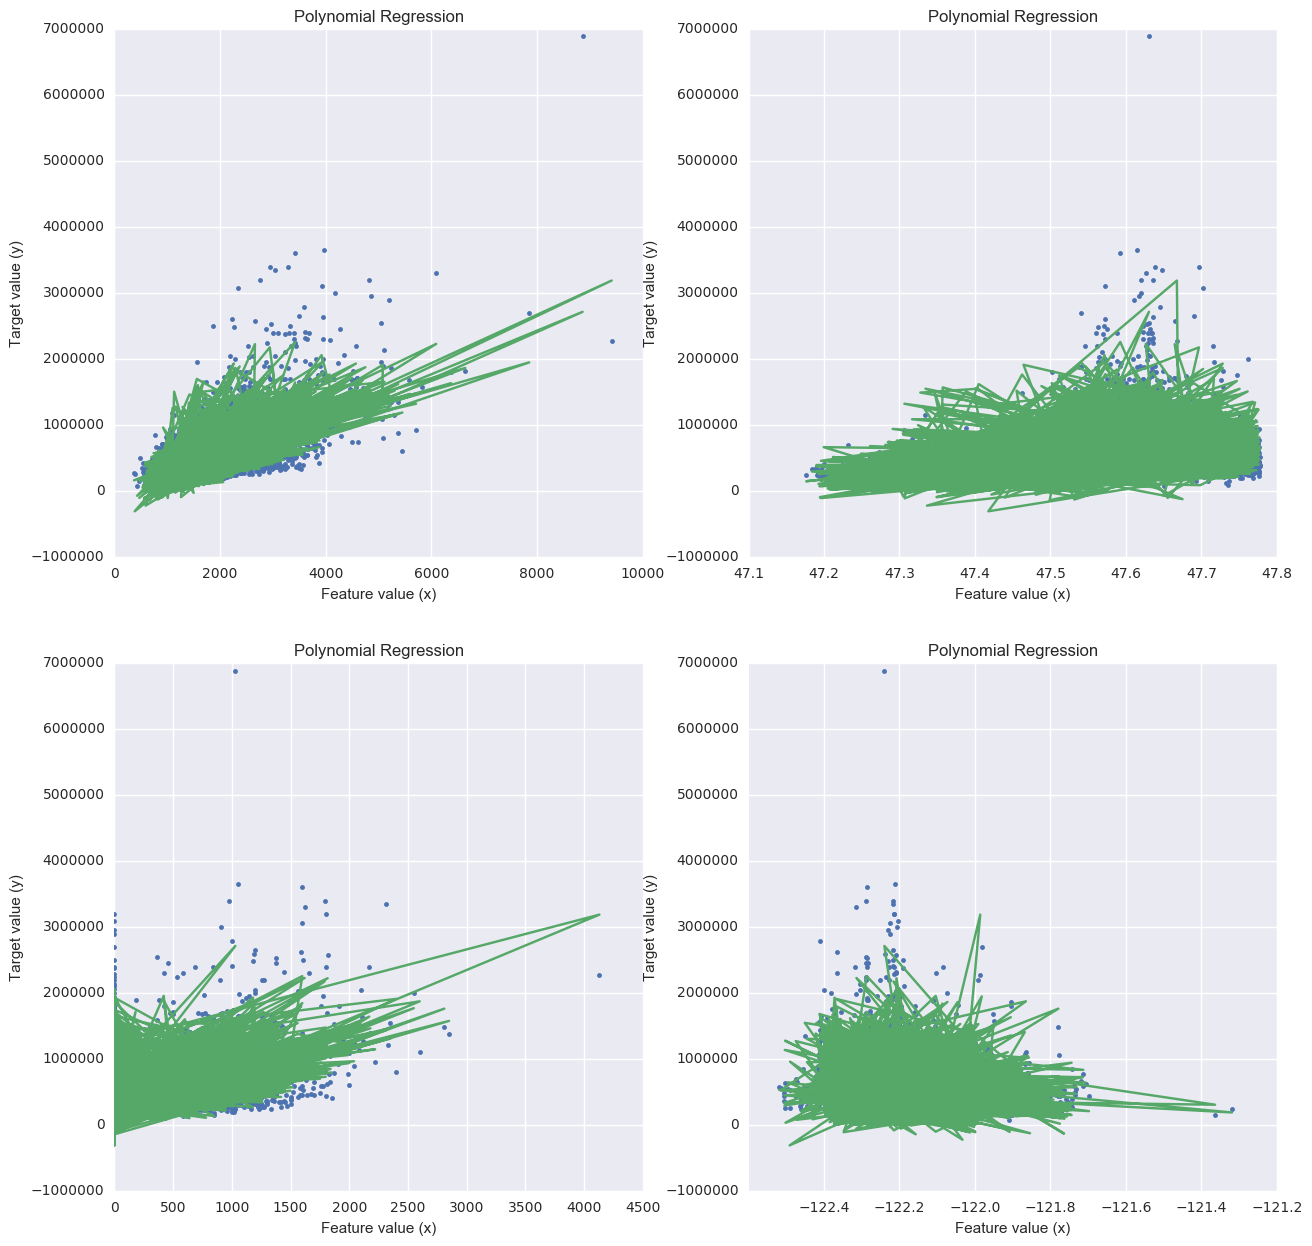

<function matplotlib.pyplot.tight_layout>

In [100]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].plot(x_test['sqft_above'],y_test,'.',
         x_test['sqft_above'],home_y_pred,'-')
axs[0, 0].set_title('Polynomial Regression')
axs[0, 0].set_xlabel('Feature value (x)')
axs[0, 0].set_ylabel('Target value (y)')    


axs[1, 0].plot(x_test['sqft_basement'],y_test,'.',
         x_test['sqft_basement'],home_y_pred,'-')
axs[1, 0].set_title('Polynomial Regression')
axs[1, 0].set_xlabel('Feature value (x)')
axs[1, 0].set_ylabel('Target value (y)')    


axs[0, 1].plot(x_test['lat'],y_test,'.',
         x_test['lat'],home_y_pred,'-')

axs[0, 1].set_title('Polynomial Regression')
axs[0, 1].set_xlabel('Feature value (x)')
axs[0, 1].set_ylabel('Target value (y)')    


axs[1, 1].plot(x_test['long'],y_test,'.',
         x_test['long'],home_y_pred,'-')

axs[1, 1].set_title('Polynomial Regression')
axs[1, 1].set_xlabel('Feature value (x)')
axs[1, 1].set_ylabel('Target value (y)')    
plt.show()
plt.tight_layout


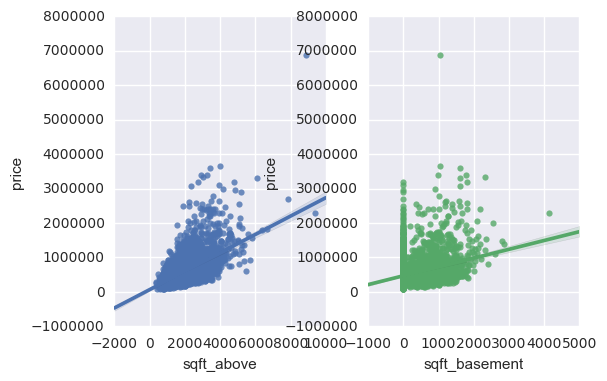

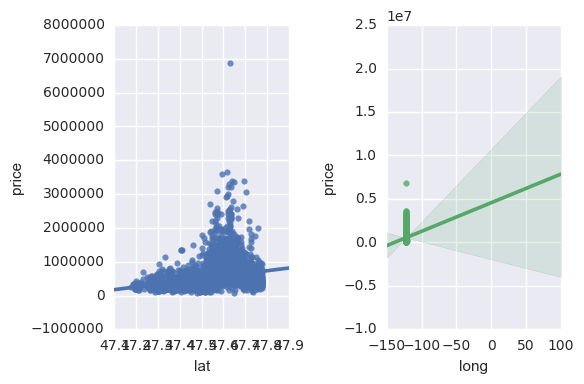

In [101]:
import seaborn as sns; sns.set(color_codes=True)
data358 = pd.concat([x_test['sqft_above'],x_test['sqft_basement'],x_test['lat'],x_test['long'],y_test],axis = 1)
#ax = sns.regplot(x=x_test['sqft_above'], y=y_test, data=data358)
#plt.show()

#sns.regplot(x=x_test['sqft_above'], y=y_test, data=data358)
tidy = (
    data358.stack() # pull the columns into row variables   
      .to_frame() # convert the resulting Series to a DataFrame
      .reset_index() # pull the resulting MultiIndex into the columns
      .rename(columns={0: 'val'}) # rename the unnamed column
)
fig, (ax1, ax2) = plt.subplots(ncols=2 ,squeeze=True)
sns.regplot(x=x_test['sqft_above'],y= y_test, data=tidy,ax = ax1)
sns.regplot(x=x_test['sqft_basement'],y= y_test, data=tidy, ax=ax2)
fig, (ax3, ax4) = plt.subplots(ncols=2 )
sns.regplot(x=x_test['lat'],y= y_test, data=tidy,ax = ax3)
sns.regplot(x=x_test['long'],y= y_test, data=tidy, ax=ax4)
plt.tight_layout()
#sns.regplot(x=x_test['lat'],y= y_test, ax=ax3)
#sns.regplot(x=x_test['long'], y=y_test, ax=ax4)
plt.show()



Now we transform the original input data to add
polynomial features up to degree n (quadratic)

train score for 1 degree polynnomial - 80 20 ratio dataset is 0.6886890729959403
test score for 1 degree polynnomial - 80 20 ratio dataset is 0.6864722714178215
train score for 2 degree polynnomial - 80 20 ratio dataset is 0.7942189732782892
test score for 2 degree polynnomial - 80 20 ratio dataset is 0.7784658763356365
train score for 3 degree polynnomial - 80 20 ratio dataset is -1.5028030644522916
test score for 3 degree polynnomial - 80 20 ratio dataset is -2.1068245858562107
train score for 4 degree polynnomial - 80 20 ratio dataset is 0.8663028140538529
test score for 4 degree polynnomial - 80 20 ratio dataset is -12.69900644803477


train score for 1 degree polynnomial - 75 25 ratio dataset is 0.6907659720234722
test score for 1 degree polynnomial - 75 25 ratio dataset is 0.6802013013117756
train score for 2 degree polynnomial - 75 25 ratio dataset is 0.7971848018090468
test score fo

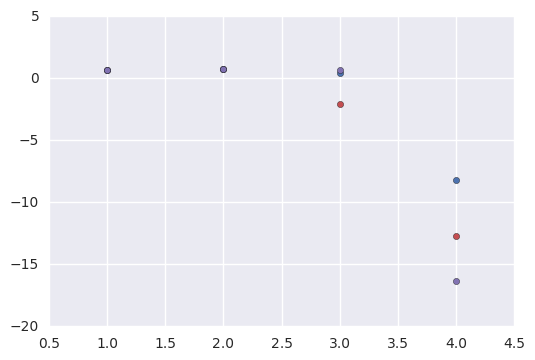

In [102]:
print('\nNow we transform the original input data to add\n\
polynomial features up to degree n (quadratic)\n')


train3 = []
test3 = []
train5 = []
test5 = []
train8 = []
test8 = []

for n in range(1,5):
    poly = PolynomialFeatures(degree=n)
    x_F1_poly1 = poly.fit_transform(x_home)

    x_train3, x_test3, y_train3, y_test3 = train_test_split(x_F1_poly1, y_home,test_size = 0.2,
                                                   random_state = 0)
    x_train5, x_test5, y_train5, y_test5 = train_test_split(x_F1_poly1, y_home,test_size = 0.25,
                                                  random_state = 0)
    x_train8, x_test8, y_train8, y_test8 = train_test_split(x_F1_poly1, y_home,test_size = 0.3,
                                                   random_state = 0)
    linreg3 = LinearRegression().fit(x_train3, y_train3)
    linreg5= LinearRegression().fit(x_train5, y_train5)
    linreg8 = LinearRegression().fit(x_train8, y_train8)
    train3.append(linreg3.score(x_train3, y_train3))
    test3.append(linreg3.score(x_test3, y_test3))
    train5.append(linreg5.score(x_train5, y_train5))
    test5.append(linreg5.score(x_test5, y_test5))
    train8.append(linreg8.score(x_train8, y_train8))
    test8.append(linreg8.score(x_test8, y_test8))
    

for i in range(0,4):    
    print('train score for {} degree polynnomial - 80 20 ratio dataset is {}'.format((i+1),train3[i]))
    print('test score for {} degree polynnomial - 80 20 ratio dataset is {}'.format((i+1),test3[i]))   

print('\n')
for i in range(0,4):    
    print('train score for {} degree polynnomial - 75 25 ratio dataset is {}'.format(i+1,train5[i]))
    print('test score for {} degree polynnomial - 75 25 ratio dataset is {}'.format(i+1,test5[i]))

print('\n')
for i in range(0,4):    
    print('train score for {} degree polynnomial - 70 20 ratio dataset is {}'.format(i+1,train8[i]))
    print('test score for {} degree polynnomial - 70 20 ratio dataset is {}'.format(i+1,test8[i]))
#plt.scatter(range(1,5), test3, c ='g')
#plt.scatter(range(1,50), test5, c ='b')
#plt.scatter(range(1,50), test8, c ='b')
#plt.show()
            
#print('(poly deg 2) linear model coeff (w):\n{}'
#     .format(linreg.coef_))
#print('(poly deg 2) linear model intercept (b): {:.3f}'
#     .format(linreg.intercept_))
#print('(poly deg 2) R-squared score (training): {:.3f}'
#     .format(linreg.score(x_train2, y_train2)))
#print('(poly deg 2) R-squared score (test): {:.3f}\n'
#     .format(linreg.score(x_test2, y_test2)))

plt.scatter(range(1,5), test3, c='r')
plt.scatter(range(1,5), test5, c='b')
plt.scatter(range(1,5), test8, c='m')
plt.show()

# Part 3

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)
x_F24_poly = poly.fit_transform(x_home)
x_train24, x_test24, y_train24, y_test24 = train_test_split(x_F24_poly, y_home,
                                                   random_state = 0)
linreg = LinearRegression().fit(x_train24, y_train24)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(x_train24, y_train24)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(x_test24, y_test24)))


print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic) and also apply ridge\n')
poly = PolynomialFeatures(degree=2)
X_F25_poly = poly.fit_transform(x_home)


x_train25, x_test25, y_train25, y_test25 = train_test_split(X_F25_poly, y_home,
                                                   random_state = 0)

x_train_scaled25 = scaler.fit_transform(x_train25)
x_test_scaled25 = scaler.transform(x_test25)

linridge = Ridge().fit(x_train_scaled25, y_train25)

print('Home dataset')   
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(x_train_scaled25, y_train25)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(x_test_scaled25, y_test25)))
#print('Number of non-zero features: {}'
#     .format(np.sum(linridge.coef_ != 0)))


linear model coeff (w): [  3.77798765e+00  -4.16442010e+09   5.39823319e+06  -4.36149630e+09
   3.93185432e+06  -2.29732830e+07   4.16438862e+09   4.16439958e+09
   4.92940123e+05   1.01760583e+04   8.91353905e+07  -8.60531035e+06
  -2.37440548e+11  -2.01351152e+07   7.52171577e+06   1.55105161e+07
   3.06631346e+07   1.51320523e+11   1.96441587e+11   9.53826226e+09
  -1.87434856e+09   4.33792520e+09   3.39316813e+09   8.60412661e+03
  -1.01461094e+05   1.47407911e+04   1.30046692e+04   2.01350970e+07
   2.01350951e+07  -1.18468440e+02  -6.22206539e+00  -2.86994105e+03
   4.18925091e+04   4.46669908e+09  -1.31673110e+03  -1.30765443e+05
  -7.52143945e+06  -7.52150427e+06   3.03658026e+03   1.19782414e+01
   8.07189667e+05   1.21272944e+06  -6.29008952e+03   6.80313637e+03
  -1.55104861e+07  -1.55104950e+07  -2.10651712e+02  -1.29763413e+01
  -1.60285809e+04   2.27183784e+04   1.73682637e+03  -3.06630994e+07
  -3.06630893e+07  -2.65063620e+02   1.20146146e+01   1.24004497e+05
  -1.43709

In [48]:
#visualize polynomial regressions

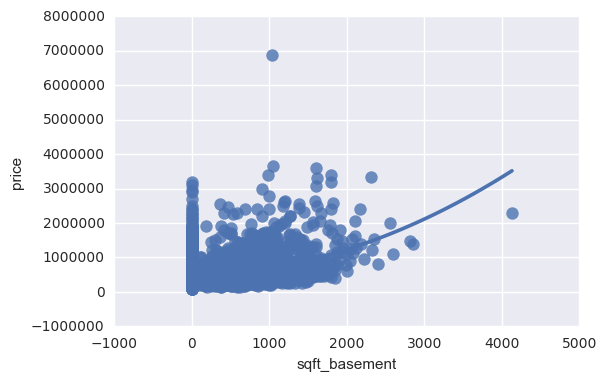

In [104]:
import seaborn as sns; sns.set(color_codes=True)
#data555 = pd.concat([x_test24['sqft_above'],y_test24],axis = 1)
#ax = sns.regplot(x=x_test24['sqft_above'], y=y_test24, data=data555)


ax = sns.regplot(x=x_test['sqft_basement'], y=y_test, data=x_home.loc[x_home.sqft_basement],
                  scatter_kws={"s": 80},
                 order=2, ci=None, truncate=True)
plt.show()


In [105]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(x_train_scaled25, y_train25)
    r2_train = linridge.score(x_train_scaled25, y_train25)
    r2_test = linridge.score(x_test_scaled25, y_test25)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 78, r-squared training: 0.80, r-squared test: 0.77

Alpha = 1.00
num abs(coeff) > 1.0: 77, r-squared training: 0.76, r-squared test: 0.72

Alpha = 10.00
num abs(coeff) > 1.0: 77, r-squared training: 0.75, r-squared test: 0.71

Alpha = 20.00
num abs(coeff) > 1.0: 77, r-squared training: 0.74, r-squared test: 0.71

Alpha = 50.00
num abs(coeff) > 1.0: 77, r-squared training: 0.73, r-squared test: 0.70

Alpha = 100.00
num abs(coeff) > 1.0: 77, r-squared training: 0.72, r-squared test: 0.70

Alpha = 1000.00
num abs(coeff) > 1.0: 77, r-squared training: 0.64, r-squared test: 0.63



In [106]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

poly = PolynomialFeatures(degree=2)
x_F49_poly = poly.fit_transform(x_home)

x_train50, x_test50, y_train50, y_test50 = train_test_split(x_F49_poly, y_home,
                                                   random_state = 0)

x_train_scaled51 = scaler.fit_transform(x_train50)
x_test_scaled51 = scaler.transform(x_test50)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(x_train_scaled51, y_train50)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(x_train_scaled51, y_train50)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(x_test_scaled51, y_test50)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(x_home), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: -1523098.477265912
lasso regression linear model coeff:
[  0.00000000e+00  -2.19889241e+04  -8.10450247e+04  -0.00000000e+00
   1.81399268e+05  -2.49365434e+05  -2.02028873e+05   0.00000000e+00
  -2.74349471e+03  -0.00000000e+00   4.83067292e+05   5.70450085e+04
   1.02051439e+06  -0.00000000e+00   2.26145576e+06   1.09715474e+06
   3.39783393e+06   1.00706431e+06   0.00000000e+00  -6.00163621e+06
   1.23648616e+05   5.33205304e+06  -0.00000000e+00   9.85786628e+04
   1.12409848e+05   3.17719153e+05   6.75168989e+05  -4.47908172e+05
  -3.55502857e+05  -1.01649968e+06  -7.04013098e+04   1.47141630e+06
   7.53727852e+05  -0.00000000e+00  -1.10313648e+05  -8.72100003e+05
   6.51902869e+05   0.00000000e+00   3.09876835e+06  -9.43653744e+04
   0.00000000e+00   2.77296536e+06  -4.93587284e+04   6.48161628e+05
   0.00000000e+00  -3.15744037e+04  -3.22985458e+06  -2.32729605e+05
   2.63930153e+06  -0.00000000e+00   1.51160807e+06  -0.00000

D:\Sarath Angathil\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [107]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(x_train_scaled51, y_train50)
    r2_train = linlasso.score(x_train_scaled51, y_train50)
    r2_test = linlasso.score(x_test_scaled51, y_test50)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model



D:\Sarath Angathil\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Alpha = 0.50
Features kept: 71, r-squared training: 0.77, r-squared test: 0.73

Alpha = 1.00
Features kept: 63, r-squared training: 0.77, r-squared test: 0.73

Alpha = 2.00
Features kept: 59, r-squared training: 0.77, r-squared test: 0.73

Alpha = 3.00
Features kept: 56, r-squared training: 0.77, r-squared test: 0.73

Alpha = 5.00
Features kept: 49, r-squared training: 0.77, r-squared test: 0.73

Alpha = 10.00
Features kept: 40, r-squared training: 0.76, r-squared test: 0.73

Alpha = 20.00
Features kept: 36, r-squared training: 0.76, r-squared test: 0.72

Alpha = 50.00
Features kept: 34, r-squared training: 0.76, r-squared test: 0.71



# Part 4

In [108]:
from sklearn.neighbors import KNeighborsRegressor

x_train80, x_test80, y_train80, y_test80 = train_test_split(x_home, y_home, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(x_train80, y_train80)

print(knnreg.predict(x_test80))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(x_test80, y_test80)))

[  322600.    571410.   1017000.  ...,   371369.    495290.    389249.8]
R-squared test score: 0.474


In [109]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
#X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train98, X_test98, y_train98, y_test98 = train_test_split(x_home, y_home,test_size = 0.20,
                                                   random_state = 0)
X_train99, X_test99, y_train99, y_test99 = train_test_split(x_home, y_home,test_size = 0.25,
                                                   random_state = 0)
X_train100, X_test100, y_train100, y_test100 = train_test_split(x_home, y_home,test_size = 0.30,
                                                   random_state = 0)

train_score98 = []
train_score99 = []
train_score100 = []
test_score98 = []
test_score99 = []
test_score100 = []

for K in [1, 3, 7, 15, 55]:
    knnreg98 = KNeighborsRegressor(n_neighbors = K).fit(X_train98, y_train98)
    train_score98.append(knnreg98.score(X_train98, y_train98))
    test_score98.append(knnreg98.score(X_test98, y_test98))
    knnreg99 = KNeighborsRegressor(n_neighbors = K).fit(X_train99, y_train99)
    train_score99.append(knnreg99.score(X_train99, y_train99))
    test_score99.append(knnreg99.score(X_test99, y_test99))
    knnreg100 = KNeighborsRegressor(n_neighbors = K).fit(X_train100, y_train100)
    train_score100.append(knnreg100.score(X_train100, y_train100))
    test_score100.append(knnreg100.score(X_test100, y_test100))
    
i=0
print('80 20 dataset')
for K in [1, 3, 7, 15, 55]:
    print(('KNN Regression (K={})\nTrain R^2 = {:.3f},  Test R^2 = {:.3f}'
                      .format(K, train_score98[i], test_score98[i])))
    i = i+1
    
print('\n75 25 dataset')
j=0
for K in [1, 3, 7, 15, 55]:
    print(('KNN Regression (K={})\nTrain R^2 = {:.3f},  Test R^2 = {:.3f}'
                      .format(K, train_score99[j], test_score99[j])))
    j = j+1
print('\n70 30 dataset')
z=0
for K in [1, 3, 7, 15, 55]:
    print(('KNN Regression (K={})\nTrain R^2 = {:.3f},  Test R^2 = {:.3f}'
                      .format(K, train_score100[z], test_score100[z])))
    z = z+1          
    #thisaxis.plot(y_test, y_predict_output)
    #thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    #thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    #thisaxis.set_xlabel('Input feature')
    #thisaxis.set_ylabel('Target value')
    #thisaxis.set_title('KNN Regression (K={})\n\
#Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
#                      .format(K, train_score, test_score))
   # thisaxis.legend()
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    #plt.show()
    


80 20 dataset
KNN Regression (K=1)
Train R^2 = 0.998,  Test R^2 = 0.211
KNN Regression (K=3)
Train R^2 = 0.735,  Test R^2 = 0.440
KNN Regression (K=7)
Train R^2 = 0.652,  Test R^2 = 0.509
KNN Regression (K=15)
Train R^2 = 0.607,  Test R^2 = 0.545
KNN Regression (K=55)
Train R^2 = 0.564,  Test R^2 = 0.539

75 25 dataset
KNN Regression (K=1)
Train R^2 = 0.999,  Test R^2 = 0.179
KNN Regression (K=3)
Train R^2 = 0.747,  Test R^2 = 0.413
KNN Regression (K=7)
Train R^2 = 0.660,  Test R^2 = 0.490
KNN Regression (K=15)
Train R^2 = 0.612,  Test R^2 = 0.530
KNN Regression (K=55)
Train R^2 = 0.566,  Test R^2 = 0.533

70 30 dataset
KNN Regression (K=1)
Train R^2 = 0.999,  Test R^2 = 0.173
KNN Regression (K=3)
Train R^2 = 0.746,  Test R^2 = 0.421
KNN Regression (K=7)
Train R^2 = 0.660,  Test R^2 = 0.490
KNN Regression (K=15)
Train R^2 = 0.613,  Test R^2 = 0.530
KNN Regression (K=55)
Train R^2 = 0.567,  Test R^2 = 0.534
